In [10]:
import warnings  #  to warn programmers about changes in language or library features 
                 # in anticipation of backwards incompatible changes coming with Python 3.0
import numpy as np  # adding support for large, multi-dimensional arrays and matrices
import pandas as pd # offers data structures and operations for manipulating numerical tables and time series
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics # metrics module implements several loss, score, 
                            # and utility functions to measure classification performance
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, f1_score # 1. Compute Receiver operating characteristic (ROC)
                                                # this implementation is restricted to the binary classification task
                                                # 2. Compute Area Under the Receiver Operating Characteristic Curve 
                                                # (ROC AUC) from prediction scores.
                                                # 3. F1 score, also known as balanced F-score or F-measure 
                                                # F1 = 2 * (precision * recall) / (precision + recall)
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns  # data visualization library based on matplotlib. 
                    # It provides a high-level interface for drawing attractive and informative statistical graphics

In [11]:
# y = df['Label'].values
# X = df.drop(['Label'], axis = 1)
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state=30)

In [20]:
#Read in the Data file to Train Model
df = pd.read_csv('Dataset/total_persons_main_info.csv',sep=',')
df = df.drop(df.columns[0],axis=1)
df = df.iloc[:2400]
print(df)
X = df.drop('Label', axis = 1)
y = df['Label']

train_percentage = 20/25
train_index = int(len(df)*train_percentage)
test_index = len(df)-train_index

df_train = df[:train_index]
df_test = df[-test_index:]

X_test = df_test.drop(["Label"],axis=1)
y_test = df_test["Label"]

X_train = df_train.drop('Label',axis=1)
y_train = df_train['Label']

           EAR       MAR       PUC       MOE      EAR_N      MAR_N      PUC_N  \
0     0.292079  0.391358  0.443185  1.339904  -1.145213  -1.070291  -0.209810   
1     0.350000  0.417129  0.499206  1.191797   0.700537   0.159836   1.088259   
2     0.341971  0.432854  0.414329  1.265763   0.444676   0.910455  -0.878449   
3     0.309173  0.446435  0.466982  1.443964  -0.600479   1.558720   0.341586   
4     0.250000  0.446435  0.415441  1.785741  -2.486155   1.558720  -0.852669   
...        ...       ...       ...       ...        ...        ...        ...   
2395  0.116538  0.503983  0.291229  4.324611 -38.944827  32.587096 -19.474165   
2396  0.168300  0.496248  0.315733  2.948584 -26.447184  31.802546 -16.471644   
2397  0.267946  0.499288  0.410285  1.863389  -2.388286  32.110879  -4.885961   
2398  0.251931  0.501019  0.391367  1.988716  -6.255092  32.286452  -7.204006   
2399  0.118409  0.502388  0.292281  4.242827 -38.493230  32.425303 -19.345237   

          MOE_N  Label  
0 

In [21]:
def average(y_pred):
    for i in range(len(y_pred)):
        if i % 240 == 0  or i % 240 == 1  or i % 240 == 2 or i % 240 == 3 or i % 240 == 4  or i % 240 == 5 or i % 240 == 6  or i % 240 == 7  or i % 240 == 8: # skipping 1st - 9th frames from each video
            continue
        consecutive_10_predictions = y_pred[i-9:i+1]   
        average = consecutive_10_predictions.mean() # each frame's 2nd previous, previous and ifself's label average will be used for new label 
        if average >= 0.5:
            y_pred[i] = 1
        else:
            y_pred[i] = 0
    return y_pred

$$ 1. Accuracy = \frac{(TP + TN)}{(TP + TN + FP + FN)} $$ 
$$ 2. F-Score / F-Measure (F_1) = 2 * \frac{precision * recall}{precision + recall} = \frac{TP}{TP + \frac{1}{2}(FP + FN)} $$ 

#### <center> 3. 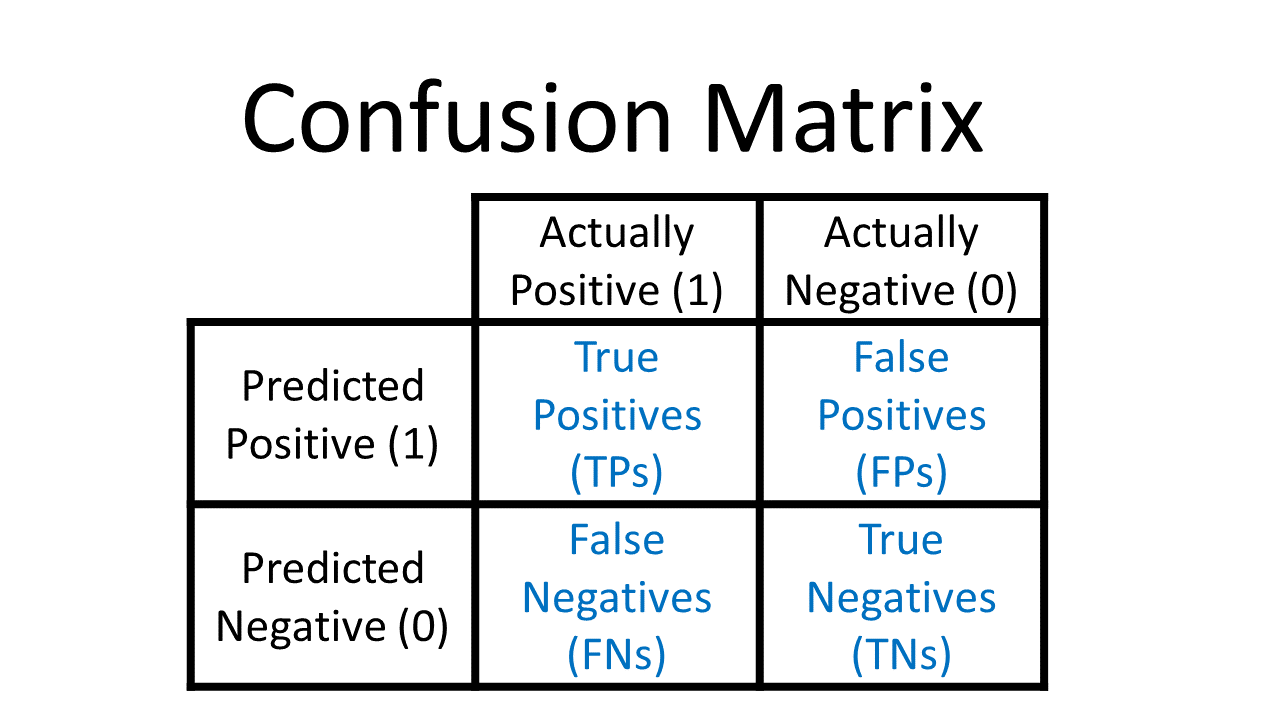 </center> ####

## 1. [Logistic Regression - 1](https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148#:~:text=Logistic%20regression%20is%20a%20classification,Fraud%2C%20Tumor%20Malignant%20or%20Benign)
## 2. [Logistic Regression - 2](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)
## 3. [Logistic Regression - 3](https://towardsdatascience.com/logistic-regression-explained-and-implemented-in-python-880955306060)
##  <img src="https://miro.medium.com/max/1400/1*RqXFpiNGwdiKBWyLJc_E7g.png" style = "width: 40vw"> ## 

In [22]:
clf_LR = LogisticRegression()
clf_LR = LogisticRegression().fit(X_train, y_train)
y_pred_1 = clf_LR.predict(X_test)
y_pred_1 = average(y_pred_1)
y_score_1 = clf_LR.predict_proba(X_test)[:,1] # predicting probablity of class or label = 1 (drowsiness) in fraction
# print(y_score_1.shape, y_score_1)

acc1 = accuracy_score(y_test, y_pred_1)  # accuracy of the model predicting from test set
f1_score_1 = metrics.f1_score(y_test, y_pred_1) # F-Score
roc_1 = metrics.roc_auc_score(y_test, y_score_1) #

print('Performance Measurement of the Model after implementing Logistic Regression:')
print('Accuracy = ', acc1)
print('F-score/F-measure = ', f1_score_1) # F-score or F-measure
print('ROC-AUC = ', roc_1) # Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) 

total_data = len(y_test)
cf_matrix_1 = confusion_matrix(y_test, y_pred_1)

TP = cf_matrix_1[0, 0]
TP_percentage = TP/total_data*100
FP = cf_matrix_1[0, 1]
FP_percentage = FP/total_data*100
FN = cf_matrix_1[1, 0]
FN_percentage = FN/total_data*100
TN = cf_matrix_1[1, 1]
TN_percentage = TN/total_data*100

print('Confusion Matrix: \nTP =', TP, '(' + str(TP_percentage) + '%)', 'FP = ', FP, '(' + str(FP_percentage) + '%)')
print('FN = ', FN, '(' + str(FN_percentage) + '%)', ' TN = ', TN, '(' + str(TN_percentage) + '%)')

cv_scores_1 = cross_val_score(clf_LR, X, y, cv=10)
cv_scores_1 = pd.Series(cv_scores_1)
print('Maximum Cross-Validated Score: ', cv_scores_1.max())
print('Mean/Average Cross-Validated Score: ', cv_scores_1.mean())
print('Minimum Cross-Validated Score: ', cv_scores_1.min())

/Users/Dayan/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Dayan/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Performance Measurement of the Model after implementing Logistic Regression:
Accuracy =  0.5
F-score/F-measure =  0.6666666666666666
ROC-AUC =  0.9018055555555556
Confusion Matrix: 
TP = 0 (0.0%) FP =  240 (50.0%)
FN =  0 (0.0%)  TN =  240 (50.0%)
Maximum Cross-Validated Score:  0.8916666666666667
Mean/Average Cross-Validated Score:  0.6816666666666666
Minimum Cross-Validated Score:  0.5041666666666667


/Users/Dayan/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Dayan/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

## 2. [Naive Bayes](https://iq.opengenus.org/gaussian-naive-bayes/#:~:text=Gaussian%20Naive%20Bayes%20is%20a,distribution%20and%20supports%20continuous%20data.&text=Naive%20Bayes%20are%20a%20group,technique%2C%20but%20has%20high%20functionality) ## 
## <img src="https://iq.opengenus.org/content/images/2020/02/Screenshot_6.jpg"> ##

In [7]:
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)
pred_NB = clf_NB.predict(X_test)
pred_NB = average(pred_NB)
y_score_2 = clf_NB.predict_proba(X_test)[:,1]
acc2 = accuracy_score(y_test, pred_NB)
f1_score_2 = metrics.f1_score(y_test, pred_NB)
roc_2 = metrics.roc_auc_score(y_test, y_score_2)

print('Performance Measurement of the Model after implementing Naive Bayes:')
print('Accuracy = ', acc2)
print('F-score/F-measure = ', f1_score_2) # F-score or F-measure
print('ROC-AUC = ', roc_2) # Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) 

total_data = len(y_test)
cf_matrix_2 = confusion_matrix(y_test, pred_NB)
TP = cf_matrix_2[0, 0]
TP_percentage = TP/total_data*100
FP = cf_matrix_2[0, 1]
FP_percentage = FP/total_data*100
FN = cf_matrix_2[1, 0]
FN_percentage = FN/total_data*100
TN = cf_matrix_2[1, 1]
TN_percentage = TN/total_data*100

print('Confusion Matrix: \nTP =', TP, '(' + str(TP_percentage) + '%)', 'FP = ', FP, '(' + str(FP_percentage) + '%)')
print('FN = ', FN, '(' + str(FN_percentage) + '%)', ' TN = ', TN, '(' + str(TN_percentage) + '%)')

cv_scores_2 = cross_val_score(clf_NB, X, y, cv=10)
cv_scores_2 = pd.Series(cv_scores_2)
print('Maximum Cross-Validated Score: ', cv_scores_2.max())
print('Mean/Average Cross-Validated Score: ', cv_scores_2.mean())
print('Minimum Cross-Validated Score: ', cv_scores_2.min())

Performance Measurement of the Model after implementing Naive Bayes:
Accuracy =  0.6941666666666667
F-score/F-measure =  0.5604790419161677
ROC-AUC =  0.6116736111111111
Confusion Matrix: 
TP = 1198 (49.916666666666664%) FP =  2 (0.08333333333333334%)
FN =  732 (30.5%)  TN =  468 (19.5%)
Maximum Cross-Validated Score:  0.7025
Mean/Average Cross-Validated Score:  0.5589999999999999
Minimum Cross-Validated Score:  0.415


## 3. [KNN](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761)

In [7]:
acc3_list = []
f1_score3_list = []
roc_3_list = []
for i in range(2,30):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train) 
    pred_KNN = neigh.predict(X_test)
    pred_KNN = average(pred_KNN)
    y_score_3 = neigh.predict_proba(X_test)[:,1]
    acc3_list.append(accuracy_score(y_test, pred_KNN))
    f1_score3_list.append(metrics.f1_score(y_test, pred_KNN))
    roc_3_list.append(metrics.roc_auc_score(y_test, y_score_3))
    
neigh = KNeighborsClassifier(n_neighbors=acc3_list.index(max(acc3_list))+1)
neigh.fit(X_train, y_train) 
pred_KNN = neigh.predict(X_test)
pred_KNN = average(pred_KNN)
y_score_3 = neigh.predict_proba(X_test)[:,1]
acc3 = accuracy_score(y_test, pred_KNN)
f1_score_3 = metrics.f1_score(y_test, pred_KNN)
roc_3 = metrics.roc_auc_score(y_test, y_score_3)

print('Performance Measurement of the Model after implementing KNN:')
print('Best Accuracy gain for the number of clusters k = ', acc3_list.index(max(acc3_list))+1)   
print('Accuracy = ', acc3)
print('F-score/F-measure = ', f1_score_3) # F-score or F-measure
print('ROC-AUC = ', roc_3) # Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) 

total_data = len(y_test)
cf_matrix_3 = confusion_matrix(y_test, pred_KNN)
TP = cf_matrix_3[0, 0]
TP_percentage = TP/total_data*100
FP = cf_matrix_3[0, 1]
FP_percentage = FP/total_data*100
FN = cf_matrix_3[1, 0]
FN_percentage = FN/total_data*100
TN = cf_matrix_3[1, 1]
TN_percentage = TN/total_data*100

print('Confusion Matrix: \nTP =', TP, '(' + str(TP_percentage) + '%)', 'FP = ', FP, '(' + str(FP_percentage) + '%)')
print('FN = ', FN, '(' + str(FN_percentage) + '%)', ' TN = ', TN, '(' + str(TN_percentage) + '%)')

cv_scores_3 = cross_val_score(neigh, X, y, cv=10)
cv_scores_3 = pd.Series(cv_scores_3)
print('Maximum Cross-Validated Score: ', cv_scores_3.max())
print('Mean/Average Cross-Validated Score: ', cv_scores_3.mean())
print('Minimum Cross-Validated Score: ', cv_scores_3.min())

Performance Measurement of the Model after implementing KNN:
Best Accuracy gain for the number of clusters k =  14
Accuracy =  0.7970833333333334
F-score/F-measure =  0.7459572248304642
ROC-AUC =  0.688871875
Confusion Matrix: 
TP = 1198 (49.916666666666664%) FP =  2 (0.08333333333333334%)
FN =  485 (20.208333333333332%)  TN =  715 (29.791666666666668%)
Maximum Cross-Validated Score:  0.7141666666666666
Mean/Average Cross-Validated Score:  0.5934999999999999
Minimum Cross-Validated Score:  0.4266666666666667


## 4. [Decision Tree](https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052)

In [8]:
from sklearn.tree import DecisionTreeClassifier
acc4=[]
max_depth = []
for i in range(2, 10):
    clf_DT = DecisionTreeClassifier(random_state=0, max_depth = i)
    clf_DT.fit(X_train, y_train)
    pred_DT = clf_DT.predict(X_test)
    pred_DT = average(pred_DT)
    acc4.append(accuracy_score(pred_DT, y_test))
    max_depth.append(i)

best_depth_4 = max_depth[acc4.index(max(acc4))]

clf_DT = DecisionTreeClassifier(random_state=0, max_depth = best_depth_4)
clf_DT.fit(X_train, y_train)
pred_DT = clf_DT.predict(X_test)
pred_DT = average(pred_DT)
y_score_4 = clf_DT.predict_proba(X_test)[:,1]
acc4 = accuracy_score(y_test, pred_DT)
f1_score_4 = metrics.f1_score(y_test, pred_DT)
roc_4 = metrics.roc_auc_score(y_test, y_score_4)

print('Performance Measurement of the Model after implementing Decision Tree:')
print('Best Depth = ', best_depth_4)
print('Accuracy = ', acc4)
print('F-score/F-measure = ', f1_score_4) # F-score or F-measure
print('ROC-AUC = ', roc_4) # Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) 

total_data = len(y_test)
cf_matrix_4 = confusion_matrix(y_test, pred_DT)
TP = cf_matrix_4[0, 0]
TP_percentage = TP/total_data*100
FP = cf_matrix_4[0, 1]
FP_percentage = FP/total_data*100
FN = cf_matrix_4[1, 0]
FN_percentage = FN/total_data*100
TN = cf_matrix_4[1, 1]
TN_percentage = TN/total_data*100

print('Confusion Matrix: \nTP =', TP, '(' + str(TP_percentage) + '%)', 'FP = ', FP, '(' + str(FP_percentage) + '%)')
print('FN = ', FN, '(' + str(FN_percentage) + '%)', ' TN = ', TN, '(' + str(TN_percentage) + '%)')

cv_scores_4 = cross_val_score(clf_DT, X, y, cv=10)
cv_scores_4 = pd.Series(cv_scores_4)

print('Maximum Cross-Validated Score: ', cv_scores_4.max())
print('Mean/Average Cross-Validated Score: ', cv_scores_4.mean())
print('Minimum Cross-Validated Score: ', cv_scores_4.min())

Performance Measurement of the Model after implementing Decision Tree:
Best Depth =  6
Accuracy =  0.7954166666666667
F-score/F-measure =  0.7444039562727747
ROC-AUC =  0.6477458333333332
Confusion Matrix: 
TP = 1194 (49.75%) FP =  6 (0.25%)
FN =  485 (20.208333333333332%)  TN =  715 (29.791666666666668%)
Maximum Cross-Validated Score:  0.7691666666666667
Mean/Average Cross-Validated Score:  0.6140833333333333
Minimum Cross-Validated Score:  0.475


## 5. [Random Forest](https://www.javatpoint.com/machine-learning-random-forest-algorithm)

In [9]:
acc5=[]
max_depth = []
for i in range(2,10):
    clf_RF = RandomForestClassifier(max_depth=i)
    clf_RF.fit(X_train, y_train) 
    pred_RF = clf_RF.predict(X_test)
    pred_RF = average(pred_RF)
    acc5.append(accuracy_score(pred_RF, y_test))
    max_depth.append(i)

best_depth_5 = max_depth[acc5.index(max(acc5))]

clf_RF = RandomForestClassifier(max_depth=best_depth_5)
clf_RF.fit(X_train, y_train) 
pred_RF = clf_RF.predict(X_test)
pred_RF = average(pred_RF)
y_score_5 = clf_RF.predict_proba(X_test)[:,1]
acc5 = accuracy_score(y_test, pred_RF)
f1_score_5= metrics.f1_score(y_test, pred_RF)
roc_5 = metrics.roc_auc_score(y_test, y_score_5)

print('Performance Measurement of the Model after implementing Random Forest:')
print('Best Depth = ', best_depth_5)
print('Accuracy = ', acc5)
print('F-score/F-measure = ', f1_score_5) # F-score or F-measure
print('ROC-AUC = ', roc_5) # Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) 

total_data = len(y_test)
cf_matrix_5 = confusion_matrix(y_test, pred_RF)
TP = cf_matrix_5[0, 0]
TP_percentage = TP/total_data*100
FP = cf_matrix_5[0, 1]
FP_percentage = FP/total_data*100
FN = cf_matrix_5[1, 0]
FN_percentage = FN/total_data*100
TN = cf_matrix_5[1, 1]
TN_percentage = TN/total_data*100

print('Confusion Matrix: \nTP =', TP, '(' + str(TP_percentage) + '%)', 'FP = ', FP, '(' + str(FP_percentage) + '%)')
print('FN = ', FN, '(' + str(FN_percentage) + '%)', ' TN = ', TN, '(' + str(TN_percentage) + '%)')

cv_scores_5 = cross_val_score(clf_RF, X, y, cv=10)
cv_scores_5 = pd.Series(cv_scores_5)

print('Maximum Cross-Validated Score: ', cv_scores_5.max())
print('Mean/Average Cross-Validated Score: ', cv_scores_5.mean())
print('Minimum Cross-Validated Score: ', cv_scores_5.min())

Performance Measurement of the Model after implementing Random Forest:
Best Depth =  9
Accuracy =  0.5966666666666667
F-score/F-measure =  0.49635796045785646
ROC-AUC =  0.5709222222222222
Confusion Matrix: 
TP = 955 (39.791666666666664%) FP =  245 (10.208333333333334%)
FN =  723 (30.125%)  TN =  477 (19.875%)
Maximum Cross-Validated Score:  0.7491666666666666
Mean/Average Cross-Validated Score:  0.5941666666666666
Minimum Cross-Validated Score:  0.4425


# 6. [XGBoosting](https://towardsdatascience.com/xgboost-theory-and-practice-fb8912930ad6#:~:text=XGBoost%20stands%20for%20eXtreme%20Gradient,power%20and%20ease%20of%20use.) 

In [10]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from numpy import loadtxt
from xgboost import XGBClassifier

clf_XGB = XGBClassifier()
clf_XGB.fit(X_train, y_train)
pred_XGB = clf_XGB.predict(X_test)
pred_XGB = average(pred_XGB)
y_score_6 = clf_XGB.predict_proba(X_test)[:,1]
acc6 = accuracy_score(y_test,pred_XGB)
f1_score_6 = metrics.f1_score(y_test, pred_XGB)
roc_6 = metrics.roc_auc_score(y_test, y_score_6)

print('Performance Measurement of the Model after implementing eXtreme Gradient Boosting:')
print("Accuracy: ", acc6)
print('F-score/F-measure = ', f1_score_6) # F-score or F-measure
print('ROC-AUC = ', roc_6) # Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) 

total_data = len(y_test)
cf_matrix_6 = confusion_matrix(y_test, pred_XGB)
TP = cf_matrix_6[0, 0]
TP_percentage = TP/total_data*100
FP = cf_matrix_6[0, 1]
FP_percentage = FP/total_data*100
FN = cf_matrix_6[1, 0]
FN_percentage = FN/total_data*100
TN = cf_matrix_6[1, 1]
TN_percentage = TN/total_data*100

print('Confusion Matrix: \nTP =', TP, '(' + str(TP_percentage) + '%)', 'FP = ', FP, '(' + str(FP_percentage) + '%)')
print('FN = ', FN, '(' + str(FN_percentage) + '%)', ' TN = ', TN, '(' + str(TN_percentage) + '%)')

cv_scores_6 = cross_val_score(clf_XGB, X, y, cv=10)
cv_scores_6 = pd.Series(cv_scores_6)

print('Maximum Cross-Validated Score: ', cv_scores_6.max())
print('Mean/Average Cross-Validated Score: ', cv_scores_6.mean())
print('Minimum Cross-Validated Score: ', cv_scores_6.min())

/Users/Dayan/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:58:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Performance Measurement of the Model after implementing eXtreme Gradient Boosting:
Accuracy:  0.5975
F-score/F-measure =  0.596153846153846
ROC-AUC =  0.5443315972222222
Confusion Matrix: 
TP = 721 (30.041666666666668%) FP =  479 (19.958333333333332%)
FN =  487 (20.291666666666668%)  TN =  713 (29.708333333333332%)
[03:58:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/Dayan/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/Dayan/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:58:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/Dayan/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:58:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/Dayan/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:58:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/Dayan/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:58:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/Dayan/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:58:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/Dayan/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:58:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/Dayan/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:58:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/Dayan/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:58:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/Dayan/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:58:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Maximum Cross-Validated Score:  0.7016666666666667
Mean/Average Cross-Validated Score:  0.5841666666666667
Minimum Cross-Validated Score:  0.41


# 7. [MLP](https://towardsdatascience.com/deep-neural-multilayer-perceptron-mlp-with-scikit-learn-2698e77155e)

In [11]:
from sklearn.neural_network import MLPClassifier

F1_score_list = []
acc7_list = []
roc_list = []
mlp = []

hidden_units = [10,20,30,40,50,60,70]
optimizer = ['sgd','adam','lbfgs']
activation = ['logistic','tanh','relu']

for j in activation:
    for i in optimizer:
        for k in hidden_units:
            clf_MLP = MLPClassifier(hidden_layer_sizes= k, activation =  j, solver= i)
            clf_MLP.fit(X_train, y_train)
            pred_MLP = clf_MLP.predict(X_test)
            pred_MLP = average(pred_MLP)
            y_score_7 = clf_MLP.predict_proba(X_test)[:,1]
            acc7_list.append(accuracy_score(y_test,pred_MLP))
            roc_list.append(metrics.roc_auc_score(y_test, y_score_7))
            F1_score_list.append(metrics.f1_score(y_test, pred_MLP))
            mlp.append([j,i,k])

min_index = acc7_list.index(max(acc7_list))

clf_MLP = MLPClassifier(hidden_layer_sizes= mlp[min_index][2], activation =  mlp[min_index][0], solver= mlp[min_index][1])
clf_MLP.fit(X_train, y_train)
pred_MLP = clf_MLP.predict(X_test)
pred_MLP = average(pred_MLP)
y_score_7 = clf_MLP.predict_proba(X_test)[:,1]
acc7 = accuracy_score(y_test,pred_MLP)
f1_score_7 = metrics.f1_score(y_test, pred_MLP)
roc_7 = metrics.roc_auc_score(y_test, y_score_7)

print('Performance Measurement of the Model after implementing Multi-Layer Perceptron:')
print("Best Accuracy: ", max(acc7_list))
print("Best Combination:", mlp[min_index])
print('F-score/F-measure = ', f1_score_7) # F-score or F-measure
print('ROC-AUC = ', roc_7) # Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) 

total_data = len(y_test)
cf_matrix_7 = confusion_matrix(y_test, pred_MLP)
TP = cf_matrix_7[0, 0]
TP_percentage = TP/total_data*100
FP = cf_matrix_7[0, 1]
FP_percentage = FP/total_data*100
FN = cf_matrix_7[1, 0]
FN_percentage = FN/total_data*100
TN = cf_matrix_7[1, 1]
TN_percentage = TN/total_data*100

print('Confusion Matrix: \nTP =', TP, '(' + str(TP_percentage) + '%)', 'FP = ', FP, '(' + str(FP_percentage) + '%)')
print('FN = ', FN, '(' + str(FN_percentage) + '%)', ' TN = ', TN, '(' + str(TN_percentage) + '%)')

cv_scores_7 = cross_val_score(clf_MLP, X, y, cv=10)
cv_scores_7 = pd.Series(cv_scores_7)

print('Maximum Cross-Validated Score: ', cv_scores_7.max())
print('Mean/Average Cross-Validated Score: ', cv_scores_7.mean())
print('Minimum Cross-Validated Score: ', cv_scores_7.min())

/Users/Dayan/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Dayan/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Dayan/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Dayan/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Dayan/anaconda3/lib/python3.8/sit

/Users/Dayan/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Dayan/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Dayan/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Dayan/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Dayan/anaconda3/lib/python3.8/sit

/Users/Dayan/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/Dayan/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/Dayan/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1)

Performance Measurement of the Model after implementing Multi-Layer Perceptron:
Best Accuracy:  0.8
Best Combination: ['logistic', 'adam', 20]
F-score/F-measure =  0.5727810650887574
ROC-AUC =  0.6423111111111112
Confusion Matrix: 
TP = 1194 (49.75%) FP =  6 (0.25%)
FN =  716 (29.833333333333336%)  TN =  484 (20.166666666666664%)


/Users/Dayan/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Dayan/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Dayan/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Dayan/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Dayan/anaconda3/lib/python3.8/sit

Maximum Cross-Validated Score:  0.7483333333333333
Mean/Average Cross-Validated Score:  0.61475
Minimum Cross-Validated Score:  0.44583333333333336


/Users/Dayan/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# 8. [CNN](https://towardsdatascience.com/covolutional-neural-network-cb0883dd6529)

In [12]:
X_train_shaped = np.expand_dims(X_train, axis=2)
X_train_shaped.shape
X_test_shaped = np.expand_dims(X_test, axis=2)
X_test_shaped.shape

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv1D
from keras.optimizers import Adam, RMSprop
from keras.layers import Dropout
## Create Model ##

model = Sequential()

model.add(Conv1D(64, kernel_size = 3, activation = 'relu', input_shape = (8,1)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation = 'sigmoid'))


## Compile Model ##
optimizer = Adam(lr=0.00001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

## Train Model and Check Validation Accuracy ##
model.fit(X_train_shaped, y_train, validation_data = (X_test_shaped,y_test), epochs = 100)

pred_CNN = model.predict_classes(X_test_shaped)
pred_CNN = average(pred_CNN)
y_score_8 = model.predict_proba(X_test_shaped)
acc8 = accuracy_score(y_test, np.array(pred_CNN))
f1_score_8 = metrics.f1_score(y_test, pred_CNN)
roc_8 = metrics.roc_auc_score(y_test, y_score_8)

print('Performance Measurement of the Model after implementing eXtreme Gradient Boosting:')
print("Accuracy: ", acc8)
print('F-score/F-measure = ', f1_score_8) # F-score or F-measure
print('ROC-AUC = ', roc_8) # Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) 

total_data = len(y_test)
cf_matrix_8 = confusion_matrix(y_test, pred_CNN)
TP = cf_matrix_8[0, 0]
TP_percentage = TP/total_data*100
FP = cf_matrix_8[0, 1]
FP_percentage = FP/total_data*100
FN = cf_matrix_8[1, 0]
FN_percentage = FN/total_data*100
TN = cf_matrix_8[1, 1]
TN_percentage = TN/total_data*100

print('Confusion Matrix: \nTP =', TP, '(' + str(TP_percentage) + '%)', 'FP = ', FP, '(' + str(FP_percentage) + '%)')
print('FN = ', FN, '(' + str(FN_percentage) + '%)', ' TN = ', TN, '(' + str(TN_percentage) + '%)')

# cv_scores_8 = cross_val_score(model, X, y, cv=10)
# cv_scores_8 = pd.Series(cv_scores_8)

# print('Maximum Cross-Validated Score: ', cv_scores_8.max())
# print('Mean/Average Cross-Validated Score: ', cv_scores_8.mean())
# print('Minimum Cross-Validated Score: ', cv_scores_8.min())

Epoch 1/100
300/300 [==============================] - 2s 4ms/step - loss: 0.7928 - accuracy: 0.4333 - val_loss: 0.7233 - val_accuracy: 0.4092
Epoch 2/100
300/300 [==============================] - 0s 2ms/step - loss: 0.7202 - accuracy: 0.4525 - val_loss: 0.7106 - val_accuracy: 0.3842
Epoch 3/100
300/300 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.4818 - val_loss: 0.7060 - val_accuracy: 0.4096
Epoch 4/100
300/300 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.5079 - val_loss: 0.7043 - val_accuracy: 0.4475
Epoch 5/100
300/300 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.5388 - val_loss: 0.7037 - val_accuracy: 0.4888
Epoch 6/100
300/300 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.5665 - val_loss: 0.7029 - val_accuracy: 0.5192
Epoch 7/100
300/300 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.5897 - val_loss: 0.7030 - val_accuracy: 0.5221

Epoch 58/100
300/300 [==============================] - 0s 1ms/step - loss: 0.5858 - accuracy: 0.7019 - val_loss: 0.6640 - val_accuracy: 0.6112
Epoch 59/100
300/300 [==============================] - 0s 1ms/step - loss: 0.5854 - accuracy: 0.7004 - val_loss: 0.6617 - val_accuracy: 0.6146
Epoch 60/100
300/300 [==============================] - 0s 1ms/step - loss: 0.5852 - accuracy: 0.6975 - val_loss: 0.6626 - val_accuracy: 0.6129
Epoch 61/100
300/300 [==============================] - 0s 2ms/step - loss: 0.5877 - accuracy: 0.6990 - val_loss: 0.6629 - val_accuracy: 0.6137
Epoch 62/100
300/300 [==============================] - 0s 1ms/step - loss: 0.5854 - accuracy: 0.6961 - val_loss: 0.6626 - val_accuracy: 0.6154
Epoch 63/100
300/300 [==============================] - 0s 1ms/step - loss: 0.5881 - accuracy: 0.6969 - val_loss: 0.6607 - val_accuracy: 0.6204
Epoch 64/100
300/300 [==============================] - 0s 1ms/step - loss: 0.5913 - accuracy: 0.6894 - val_loss: 0.6630 - val_accuracy:

/Users/Dayan/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/Dayan/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Performance Measurement of the Model after implementing eXtreme Gradient Boosting:
Accuracy:  0.7
F-score/F-measure =  0.5714285714285715
ROC-AUC =  0.7002486111111111
Confusion Matrix: 
TP = 1200 (50.0%) FP =  0 (0.0%)
FN =  720 (30.0%)  TN =  480 (20.0%)


## 1. [Annotate bars in barplot using matplotlib and seaborn](https://datavizpyr.com/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/) 
## 2. [Sort bars in barplot using matplotlib and seaborn](https://datavizpyr.com/sort-bars-in-barplot-using-seaborn-in-python/)
## 3. [Add percentages on top of bars](https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn)

# Accuracy of all the classifiers for test dataset in descending order

Text(0.5, 1.0, 'Accuracy of all the classifiers for test dataset in descending order')

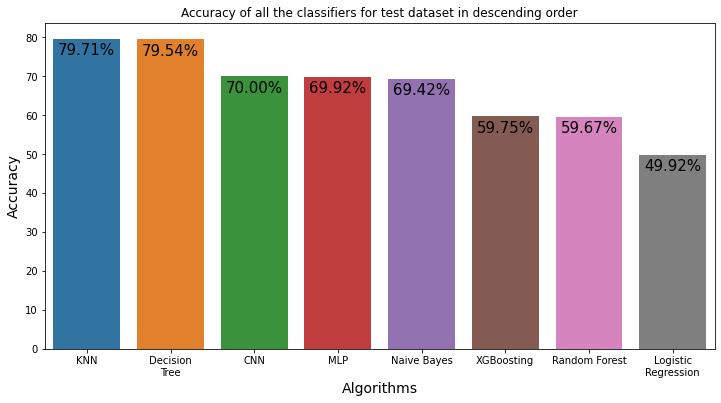

In [21]:
# Accuracy of all the classifiers for test dataset in descending order
algorithms = ['Logistic\nRegression','Naive Bayes', 'KNN', 'Decision\nTree','Random Forest', 'XGBoosting', 'MLP', 'CNN']
accuracy = [acc1 * 100, acc2 * 100, acc3 * 100, acc4 * 100, acc5 * 100, acc6 * 100, acc7 * 100, acc8 * 100]

df = pd.DataFrame({"algorithms": algorithms, "accuracy": accuracy})

plt.figure(figsize=(12, 6))
splot=sns.barplot(x="algorithms",y="accuracy",data=df, order=df.sort_values('accuracy',ascending = False).algorithms)
for p in splot.patches:
    splot.annotate('{:.2f}%'.format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.xlabel("Algorithms", size=14)
plt.ylabel("Accuracy", size=14)
plt.title('Accuracy of all the classifiers for test dataset in descending order')


# Cross-validated Accuracy (Best Case) in descending order

Text(0.5, 1.0, 'Cross-validated Accuracy (Best Case) of all the classifiers in descending order')

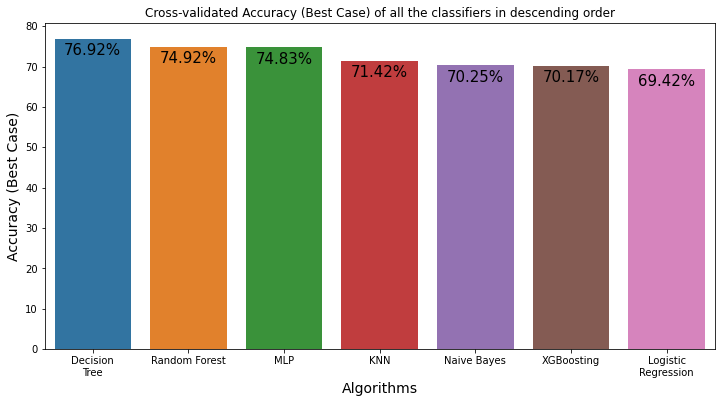

In [23]:
# Cross-validated Accuracy (Best Case) of all the classifiers in descending order
algorithms = ['Logistic\nRegression','Naive Bayes', 'KNN', 'Decision\nTree','Random Forest', 'XGBoosting', 'MLP']
cross_validated_max_accuracy = [cv_scores_1.max() * 100, cv_scores_2.max() * 100, cv_scores_3.max() * 100, cv_scores_4.max() * 100, cv_scores_5.max() * 100, cv_scores_6.max() * 100, cv_scores_7.max() * 100]

df = pd.DataFrame({"algorithms": algorithms, "cross_validated_max_accuracy": cross_validated_max_accuracy})

plt.figure(figsize=(12, 6))
splot=sns.barplot(x="algorithms",y="cross_validated_max_accuracy",data=df, order=df.sort_values('cross_validated_max_accuracy',ascending = False).algorithms)
for p in splot.patches:
    splot.annotate('{:.2f}%'.format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.xlabel("Algorithms", size=14)
plt.ylabel("Accuracy (Best Case)", size=14)
plt.title('Cross-validated Accuracy (Best Case) of all the classifiers in descending order')


# Cross-validated Accuracy (Average Case) in descending order

Text(0.5, 1.0, 'Cross-validated Accuracy (Average Case) of all the classifiers in descending order')

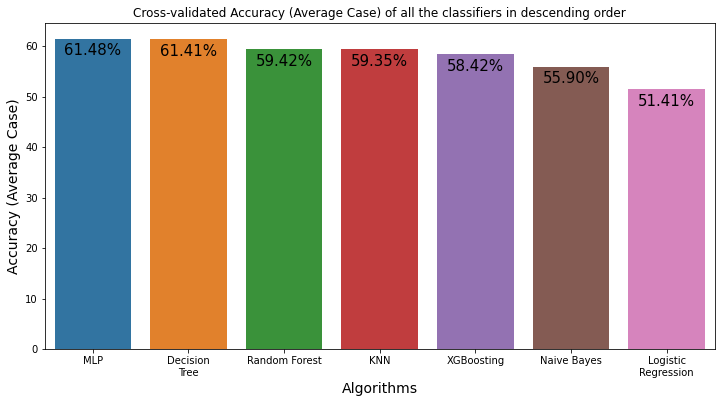

In [24]:
# Cross-validated Accuracy (Average Case) of all the classifiers in descending order
algorithms = ['Logistic\nRegression','Naive Bayes', 'KNN', 'Decision\nTree','Random Forest', 'XGBoosting', 'MLP']
cross_validated_mean_accuracy = [cv_scores_1.mean() * 100, cv_scores_2.mean() * 100, cv_scores_3.mean() * 100, cv_scores_4.mean() * 100, cv_scores_5.mean() * 100, cv_scores_6.mean() * 100, cv_scores_7.mean() * 100]

df = pd.DataFrame({"algorithms": algorithms, "cross_validated_mean_accuracy": cross_validated_mean_accuracy})

plt.figure(figsize=(12, 6))
splot=sns.barplot(x="algorithms",y="cross_validated_mean_accuracy",data=df, order=df.sort_values('cross_validated_mean_accuracy',ascending = False).algorithms)
for p in splot.patches:
    splot.annotate('{:.2f}%'.format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.xlabel("Algorithms", size=14)
plt.ylabel("Accuracy (Average Case)", size=14)
plt.title('Cross-validated Accuracy (Average Case) of all the classifiers in descending order')


# Cross-validated Accuracy (Worst Case) in descending order

Text(0.5, 1.0, 'Cross-validated Accuracy (Worst Case) of all the classifiers in descending order')

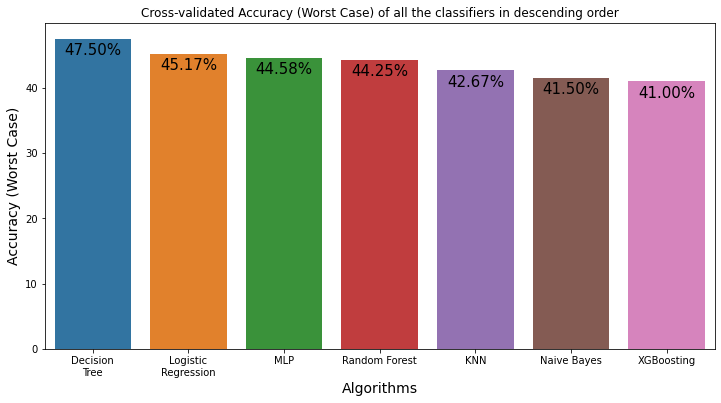

In [25]:
# Cross-validated Accuracy (Worst Case) of all the classifiers in descending order
algorithms = ['Logistic\nRegression','Naive Bayes', 'KNN', 'Decision\nTree','Random Forest', 'XGBoosting', 'MLP']
cross_validated_min_accuracy = [cv_scores_1.min() * 100, cv_scores_2.min() * 100, cv_scores_3.min() * 100, cv_scores_4.min() * 100, cv_scores_5.min() * 100, cv_scores_6.min() * 100, cv_scores_7.min() * 100]

df = pd.DataFrame({"algorithms": algorithms, "cross_validated_min_accuracy": cross_validated_min_accuracy})

plt.figure(figsize=(12, 6))
splot=sns.barplot(x="algorithms",y="cross_validated_min_accuracy",data=df, order=df.sort_values('cross_validated_min_accuracy',ascending = False).algorithms)
for p in splot.patches:
    splot.annotate('{:.2f}%'.format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.xlabel("Algorithms", size=14)
plt.ylabel("Accuracy (Worst Case)", size=14)
plt.title('Cross-validated Accuracy (Worst Case) of all the classifiers in descending order')


# F-Score/F-Measure for all the classifiers

Text(0.5, 1.0, 'F-Score/F-Measure of all the classifiers in descending order')

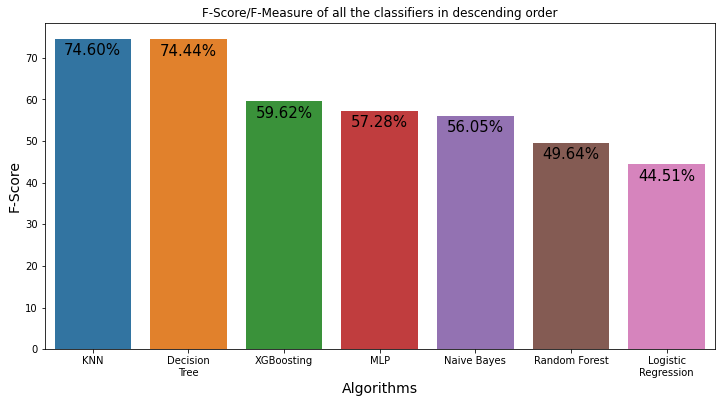

In [26]:
# F-Score/F-Measure of all the classifiers in descending order
algorithms = ['Logistic\nRegression','Naive Bayes', 'KNN', 'Decision\nTree','Random Forest', 'XGBoosting', 'MLP']
f1_score = [f1_score_1.min() * 100, f1_score_2.min() * 100, f1_score_3.min() * 100, f1_score_4.min() * 100, f1_score_5.min() * 100, f1_score_6.min() * 100, f1_score_7.min() * 100]

df = pd.DataFrame({"algorithms": algorithms, "F-Score": f1_score})

plt.figure(figsize=(12, 6))
splot=sns.barplot(x="algorithms",y="F-Score",data=df, order=df.sort_values('F-Score',ascending = False).algorithms)
for p in splot.patches:
    splot.annotate('{:.2f}%'.format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.xlabel("Algorithms", size=14)
plt.ylabel("F-Score", size=14)
plt.title('F-Score/F-Measure of all the classifiers in descending order')

### 4. [AUC: Area Under the ROC Curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5) ###
# <center> 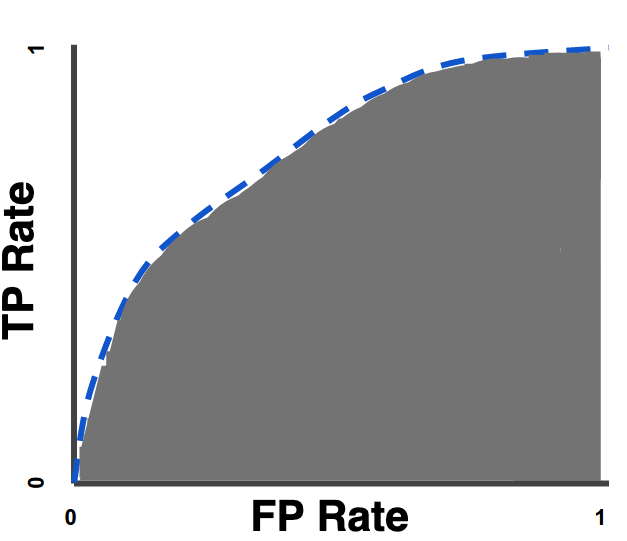 </center> # 
### <center> 5. True Positive Rate (TPR) =  $ \frac{TP}{(TP + FN)} $ , False Positive Rate (FPR) = $ \frac{FP}{(FP + TN)} $ ### 

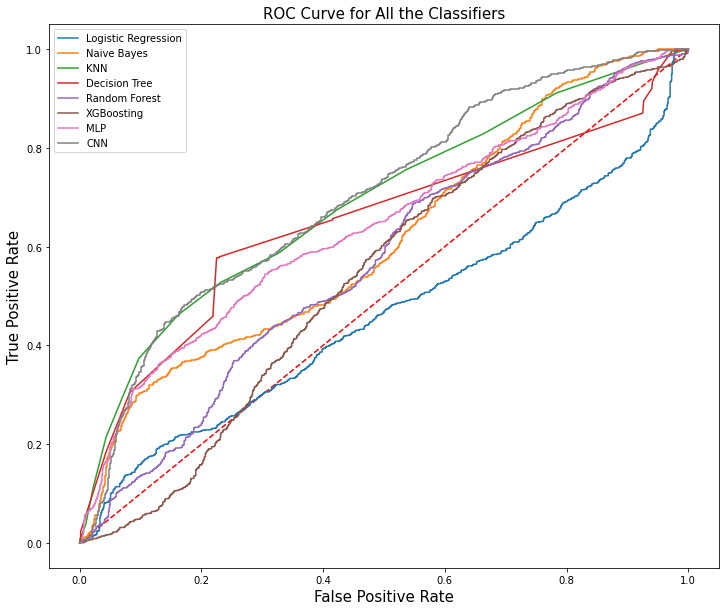

In [27]:
plt.figure(figsize=(12,10))  # figsize (float, float) width, height in inches 
plt.plot([0, 1], [0, 1], 'r--') # 'r--' means red dash line in the middle of the graph. single dash means solid line.

fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, y_score_1) # roc_curve() returns fprndarray of shape (>2,), 
                                            # tprndarray of shape (>2,), thresholdsndarray of shape = (n_thresholds,)
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_score_2)
fpr_3, tpr_3, thresholds_3 = roc_curve(y_test, y_score_3)
fpr_4, tpr_4, thresholds_4 = roc_curve(y_test, y_score_4)
fpr_5, tpr_5, thresholds_5 = roc_curve(y_test, y_score_5)
fpr_6, tpr_6, thresholds_6 = roc_curve(y_test, y_score_6)
fpr_7, tpr_7, thresholds_7 = roc_curve(y_test, y_score_7)
fpr_8, tpr_8, thresholds_8 = roc_curve(y_test, y_score_8)

plt.plot(fpr_1, tpr_1, label= "Logistic Regression")
plt.plot(fpr_2, tpr_2, label= "Naive Bayes")
plt.plot(fpr_3, tpr_3, label= "KNN")
plt.plot(fpr_4, tpr_4, label= "Decision Tree")
plt.plot(fpr_5, tpr_5, label= "Random Forest")
plt.plot(fpr_6, tpr_6, label= "XGBoosting")
plt.plot(fpr_7, tpr_7, label= "MLP")
plt.plot(fpr_8, tpr_8, label= "CNN")

plt.title('ROC Curve for All the Classifiers', fontsize="15")
plt.xlabel('False Positive Rate', fontsize="15")
plt.ylabel('True Positive Rate', fontsize="15")
plt.legend()      # 